In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### gradient_descent

In [2]:
def add_bias(X):
    return np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

def logistic_sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(theta, X, y):
    theta = theta.reshape(-1, 1)
    predictions = logistic_sigmoid(np.dot(X, theta))
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

def gradient_descent(theta, X, y, learning_rate=0.02, num_epochs=20000):
    theta = theta.reshape(-1, 1)
    cost_history = []
    for _ in range(num_epochs):
        predictions = logistic_sigmoid(np.dot(X, theta))
        gradients = np.dot(X.T, (predictions - y)) / len(y)
        theta -= learning_rate * gradients
        cost_history.append(cross_entropy_loss(theta, X, y))
    return theta, cost_history

### homework_ex2_01

In [3]:
data1 = pd.read_csv("../data/ex2data1.txt", names=['exam1', 'exam2', 'accepted'])
X1 = np.array(data1.iloc[:, 0:-1])
y1 = np.array(data1.iloc[:, -1]).reshape((-1, 1))
X1_with_bias = add_bias(X1)
theta = np.zeros((X1_with_bias.shape[1], 1))

In [4]:
# 初始化交叉熵损失
init_cross_entropy_loss = cross_entropy_loss(theta, X1_with_bias, y1)
print(f"初始交叉熵损失: {init_cross_entropy_loss}")

# 执行梯度下降
final_theta, cost_history = gradient_descent(theta, X1_with_bias, y1, learning_rate=0.004, num_epochs=500000)
print(f"最终参数: {final_theta}")
print(f"交叉熵损失: {cross_entropy_loss(final_theta, X1_with_bias, y1)}")

初始交叉熵损失: 0.6931471805599453
最终参数: [[  0.19954275]
 [  0.19470365]
 [-24.32498139]]
交叉熵损失: 0.20360477436005134


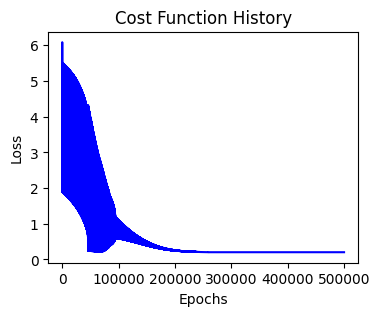

In [5]:
def plot_cost_curve(cost_history, figsize=(4, 3)):
    plt.figure(figsize=figsize)
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.title('Cost Function History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

# 绘制成本历史曲线
plot_cost_curve(cost_history)

In [6]:
# 计算最终预测和准确度
final_predictions = logistic_sigmoid(np.dot(X1_with_bias, final_theta))
final_predicted_classes = (final_predictions >= 0.5).astype(int)

accuracy = np.mean(final_predicted_classes == y1)
print(f"准确度: {accuracy * 100:.2f}%")

准确度: 89.00%


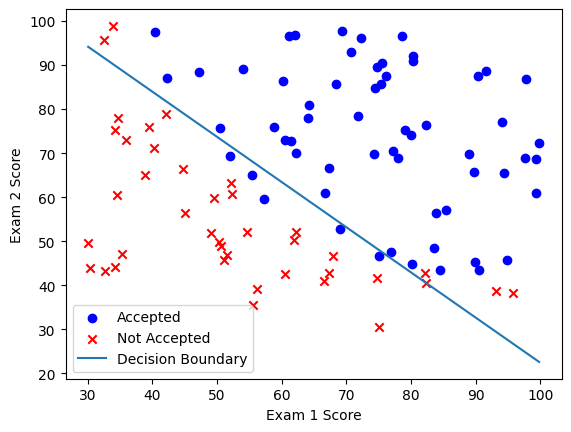

In [7]:
positive = data1[data1['accepted'] == 1]
negative = data1[data1['accepted'] == 0]
plt.scatter(positive['exam1'], positive['exam2'], c='b', marker='o', label='Accepted')
plt.scatter(negative['exam1'], negative['exam2'], c='r', marker='x', label='Not Accepted')

theta_0, theta_1, bias = final_theta

plot_x = np.array([min(X1[:, 0]), max(X1[:, 0])])
plot_y = - (bias + theta_0 * plot_x) / theta_1

plt.plot(plot_x, plot_y, label='Decision Boundary')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()

### homework_ex2_02

In [8]:
data2 = pd.read_csv("../data/ex2data2.txt", names=['test1', 'test2', 'accepted'])
X2 = np.array(data2.iloc[:, 0:-1])
y2 = np.array(data2.iloc[:, -1]).reshape(-1, 1)

def polynomial_feature_map(X, max_degree=6):
    n_samples, n_features = X.shape
    features = []
    for degree in range(1, max_degree + 1):
        for items in itertools.combinations_with_replacement(range(n_features), degree):
            features.append(np.prod(X[:, items], axis=1))
    features.append(np.ones(n_samples))
    return np.column_stack(features)

X_map = polynomial_feature_map(X2)
theta = np.zeros((X_map.shape[1], 1))

In [9]:
def logistic_sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss_regularized(theta, X, y, lambda_reg=0.1):
    theta = theta.reshape(-1, 1)
    predictions = logistic_sigmoid(np.dot(X, theta))
    regularization_loss = (lambda_reg / (2 * len(y))) * np.sum(theta[:-1] ** 2)
    cross_loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cross_loss + regularization_loss

def gradient_descent_regularized(theta, X, y, learning_rate=0.02, lambda_reg=0.1, num_epochs=200000):
    m = len(y)
    n = X.shape[1]
    for _ in range(num_epochs):
        predictions = logistic_sigmoid(np.dot(X, theta))
        gradients = np.dot(X.transpose(), (predictions - y)) / m
        regularization_term = (lambda_reg / m) * np.concatenate((theta[:-1].flatten(), [0]))
        regularization_term = regularization_term.reshape((n, -1))
        gradients[:-1] += regularization_term[:-1]
        theta -= learning_rate * gradients
    return theta

In [10]:
init_cross_entropy_loss = cross_entropy_loss_regularized(theta, X_map, y2)
print(f"init_cross_entropy_loss: {init_cross_entropy_loss}")

final_theta = gradient_descent_regularized(theta, X_map, y2)
print(f"final_theta: {final_theta}")
print(f"final cross_entropy_loss: {cross_entropy_loss_regularized(final_theta, X_map, y2)}")

final_predictions = logistic_sigmoid(np.dot(X_map, final_theta))
final_predicted_classes = (final_predictions >= 0.5).astype(int)

accuracy = np.mean(final_predicted_classes == y2)
print(f"Accuracy: {accuracy * 100:.2f}%")

init_cross_entropy_loss: 0.6931471805599454
final_theta: [[ 1.80920219]
 [ 2.95356892]
 [-4.20969418]
 [-3.36958655]
 [-4.22449393]
 [ 0.74284344]
 [-1.08326657]
 [-0.48355851]
 [-0.48902928]
 [-3.27230101]
 [ 0.51529701]
 [-1.76283382]
 [-1.20984728]
 [-2.76875291]
 [-0.6169531 ]
 [-0.47049033]
 [ 0.60414232]
 [-1.12985271]
 [-1.20195718]
 [-0.10265863]
 [-2.63008423]
 [ 0.44388632]
 [-0.73981574]
 [ 0.41310605]
 [-1.1389608 ]
 [-0.95259454]
 [-1.1568436 ]
 [ 2.75287892]]
final cross_entropy_loss: 0.3945950142597956
Accuracy: 83.90%


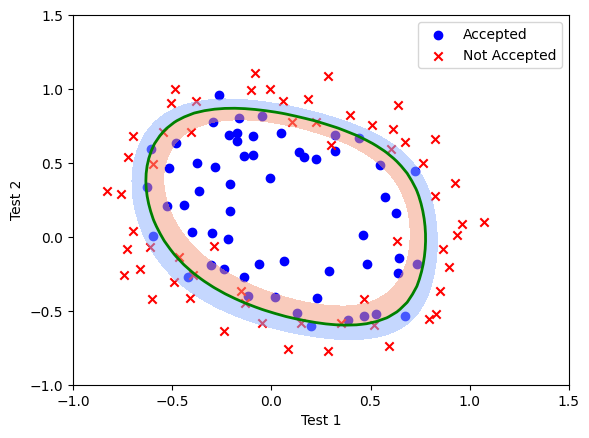

In [11]:
positive = data2[data2['accepted'] == 1]
negative = data2[data2['accepted'] == 0]
plt.scatter(positive['test1'], positive['test2'], c='b', marker='o', label='Accepted')
plt.scatter(negative['test1'], negative['test2'], c='r', marker='x', label='Not Accepted')

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
U, V = np.meshgrid(u, v)
UV = np.c_[U.ravel(), V.ravel()]

poly_features = polynomial_feature_map(UV)
Z = np.dot(poly_features, final_theta)
Z = Z.reshape(U.shape)

plt.contourf(U, V, Z, levels=[-1, 0, 1], cmap=plt.cm.coolwarm, alpha=0.5)
plt.contour(U, V, Z, levels=[0], colors="green", linewidths=2)

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.show()